In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

from model_prediction import RE
from model_prediction import Replicator
from pneumococcus_data import data_observation

In [2]:
from PSO_algo import Particle
from PSO_algo import PSO

In [3]:
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()

Iran_strain = np.array(Iran.strain)
Iran_cases = np.array(Iran.cases)
strain_number = len(Iran_strain) # = 30

# muy-values of Iran
mu = 6

#import Brazil alpha & data
Brazil_alpha = np.loadtxt(open("Brazil_alpha.txt","rb"), delimiter = ",", skiprows = 0)
Brazil_strain = np.array(Brazil.strain)

#import Denmark alpha & data
Denmark_alpha = np.loadtxt(open("Denmark_alpha.txt","rb"), delimiter = ",", skiprows = 0)
Denmark_strain = np.array(Denmark.strain)

#import Mozambique alpha & data
Mozambique_alpha = np.loadtxt(open("Mozambique_alpha.txt","rb"), delimiter = ",", skiprows = 0)
Mozambique_strain = np.array(Mozambique.strain)

In [4]:
# initiate matrix Mozambique_alpha
Iran_alpha = np.ones((strain_number, strain_number))*50

for xI, strain_xI in enumerate(Iran_strain):
    for yI, strain_yI in enumerate(Iran_strain):
        #insert from Brazil
        find_xBrazil = np.where(Brazil_strain == strain_xI)
        index_xBrazil = find_xBrazil[0]

        find_yBrazil = np.where(Brazil_strain == strain_yI)
        index_yBrazil = find_yBrazil[0]

        #insert from Denmark
        find_xDenmark = np.where(Denmark_strain == strain_xI)
        index_xDenmark = find_xDenmark[0]

        find_yDenmark = np.where(Denmark_strain == strain_yI)
        index_yDenmark = find_yDenmark[0]

        #insert from Mozambique
        find_xMozambique = np.where(Mozambique_strain == strain_xI)
        index_xMozambique = find_xMozambique[0]

        find_yMozambique = np.where(Mozambique_strain == strain_yI)
        index_yMozambique = find_yMozambique[0]


        if index_xBrazil.size > 0 and index_yBrazil.size > 0:
            Iran_alpha[xI, yI] = Brazil_alpha[index_xBrazil, index_yBrazil]
        elif index_xDenmark.size > 0 and index_yDenmark.size > 0:
            Iran_alpha[xI, yI] = Denmark_alpha[index_xDenmark, index_yDenmark]
        elif index_xMozambique.size > 0 and index_yMozambique.size > 0:
            Iran_alpha[xI, yI] = Mozambique_alpha[index_xMozambique, index_yMozambique]

np.savetxt('fix_alpha_Iran.txt', Iran_alpha, delimiter = ',')

In [5]:
#find the length of vector that we need to fit the matrix Iran alpha
length = 0

for i in range(0, strain_number):
    for j in range(0, strain_number):
        if Iran_alpha[i,j] > 49:
            length += 1

print(length)
#so we need to fit the matrix Iran

612


In [6]:
#find the coordinate of missing alpha_ij in Denmark alpha_matrix
position = []

for i in range (0, strain_number):
    for j in range (0, strain_number):
        if Iran_alpha[i,j] > 49:
            position.append(np.array([i,j]))

In [7]:
#cost function for PSO
u0 = 1/strain_number*np.ones(strain_number)

def func(vector):
    # insert alpha vector to Iran_alpha
    alpha_matrix = np.loadtxt(open("fix_alpha_Iran.txt","rb"), delimiter = ",", skiprows = 0)
    for i in range (0, length):
        coordinate = position[i]
        alpha_matrix[coordinate[0], coordinate[1]] = vector[i]

    #compute invasion fitness matrix
    lambd = np.zeros((strain_number, strain_number))
    for i in range (0, strain_number):
        for j in range (0, strain_number):
            lambd[i][j] = mu*(alpha_matrix[j][i] - alpha_matrix[i][j]) + alpha_matrix[j][i] - alpha_matrix[j][j]

    #compute right-hand-side of replicator equations
    solution = Replicator(strain_number, lambd, 50, u0)
    err = np.linalg.norm(solution - Iran_cases)

    return  err

In [10]:
# RUN PSO algo
# initial starting location [x1,x2...]
initial = [0]*length
#print(func(initial))

#---2.5 days

# input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
bounds = []
for i in range (0, length):
    bounds.append(np.array([-10, 10]))
bounds = np.array(bounds)

PSO(func, initial, bounds, num_particles = 4000, maxiter = 200)

FINAL:
[-1.0540376921672046, -0.04573407654220144, 0.4751112620507438, 0.4573520678674209, 0.007683328328525216, 0.1436332408425484, -0.4919204630469216, 0.6764736031311644, -1.6242712725928188, -2.257978220909088, -0.2537112824877295, 0.7002082178171575, -0.21769156443097717, 0.19415901615618752, -0.7234183185696328, 0.1501125865547996, 0.6342646757345625, -0.14936045538310383, -0.29109341594444615, 0.15294940327467116, -0.2179294278029655, -0.04223419102089378, -0.25709186042744747, 0.6461315090234, 0.5366628539904337, -0.26747164413265806, -0.7267634143951353, -1.109391574811938, 0.9711020718549993, -1.107202553435298, 1.5848764018537067, -0.3977049288407735, 1.442164212214011, 0.4170441733701134, -0.2804486838847304, -0.311802928665373, -0.2387351013459626, 0.26546233685927656, -0.627433968014661, -1.2977153704784923, -0.05402617600752176, 0.19855691089236394, 0.5068334634308165, -0.6088220782682023, -0.25731746999798033, 0.19398276293267594, 2.4448488134065176, 0.05158574647547515

In [8]:
opti_Iran = [-1.0540376921672046, -0.04573407654220144, 0.4751112620507438, 0.4573520678674209, 0.007683328328525216, 0.1436332408425484, -0.4919204630469216, 0.6764736031311644, -1.6242712725928188, -2.257978220909088, -0.2537112824877295, 0.7002082178171575, -0.21769156443097717, 0.19415901615618752, -0.7234183185696328, 0.1501125865547996, 0.6342646757345625, -0.14936045538310383, -0.29109341594444615, 0.15294940327467116, -0.2179294278029655, -0.04223419102089378, -0.25709186042744747, 0.6461315090234, 0.5366628539904337, -0.26747164413265806, -0.7267634143951353, -1.109391574811938, 0.9711020718549993, -1.107202553435298, 1.5848764018537067, -0.3977049288407735, 1.442164212214011, 0.4170441733701134, -0.2804486838847304, -0.311802928665373, -0.2387351013459626, 0.26546233685927656, -0.627433968014661, -1.2977153704784923, -0.05402617600752176, 0.19855691089236394, 0.5068334634308165, -0.6088220782682023, -0.25731746999798033, 0.19398276293267594, 2.4448488134065176, 0.051585746475475154, -1.8899633844054984, -0.47343639973873425, -0.1113176636124145, 0.06589119305417905, 2.8748435936245524, -0.6658096814099886, 0.1360202549748597, -0.20773998986076872, -0.43254937412448824, 1.1396043867614387, -2.4101154425028724, -0.3645221318160581, 0.936263997340023, -1.1731051238843777, 1.3107549333822133, -0.17375259347837457, -0.7304413422679042, -0.36563359027311065, -0.658473334871987, 0.4661025683208551, 0.09990109446443539, 0.10639741172374591, 0.4330433630438023, -0.423594645076816, -0.5339387291130386, -0.3331897916887121, 1.4527270711554103, 0.3434739843062996, -0.28590807922405287, 1.0670119872219879, -0.6308963974162408, 0.06748481437365601, -0.917980791071556, 1.428344322529139, 0.08572881197682043, -0.6491026803788881, -1.6673733875425663, -0.47663327680745915, -0.13169644108648457, -1.0772353181349252, 1.0765217708531183, 0.46337545030403215, 0.19644736519061207, 0.5643875843463457, 1.0847406040268668, 0.583108458402032, 0.5816356567000165, -1.543351173804612, 1.2039022223846214, -0.732021746528258, -0.5973791542226955, -0.6038480729040965, -0.250958657365744, 0.008587215713440469, 0.09766565426660483, 0.7845054476841898, 0.21371017566997527, -0.7713800131791277, -0.5387088601289033, -2.0815401747174405, -0.18502399567405212, 0.7346045981364558, 0.5149419688127288, -0.15745427987124072, -0.7276072734732794, -0.5828590467188333, 1.5616296684203768, -0.9303270192412524, 2.0479685435094264, -0.4086495742765482, 1.3676156506342545, 1.0032161578321244, -2.224955394745622, 0.20240445994182754, -1.5465986273310492, -1.6233888344498093, 0.004055636292252886, -1.0435750961042072, 0.03904451094856188, -0.2479390010704197, -0.9505521308497845, -0.9513314271365866, -1.6662651957240124, 0.1434070936284187, -2.2753977605868094, 0.14389386107424754, -0.43192532576983406, 1.3079867851756923, -0.9089407039183232, 0.07917504929970488, 0.007071395949531183, 0.3066255252238971, 0.5466012443617586, 1.1598549873657857, -0.10014938254756847, -1.1979110330666034, 1.160572164089359, 0.969632269987222, 0.8741132625460081, -0.9324240278677268, 0.43887886606404586, -0.09806148604441962, -1.69881667636675, -0.7816634340687566, -1.192373415472758, 0.04488562913236134, -0.007272518114442467, -0.1737494894856594, -0.22503428227962624, 1.2447780641173811, -1.038595645795382, 0.13100292541962066, 0.9501751605790248, -0.31106329105857544, -0.5220422027705844, 0.6139197331698478, 0.317112606779869, 0.9896803529769926, 0.5713895645704579, 0.779251796051901, -0.010369767462719125, -0.9249322640383429, 0.28836740496453617, 0.3794989415591288, -0.4160647594502908, -0.355356596643418, -0.36805467217964444, 0.8614549956265557, -0.3118380007255886, -0.08351577324968373, 0.3505217527527186, -1.2249665415596482, 1.2068503913877608, -1.273779085097468, 0.2103638519723776, -1.2647035169151826, -0.07975911898124122, 0.3172139889501315, -0.22148968501262178, 0.004553712170771764, 0.6319233251199702, -3.7307614229054478, 1.1327608264687394, -0.5778314383524081, -1.0182961293495567, -0.03643384768592391, -0.38068533821519446, -0.23776511401958897, 1.835899077503593, 0.126048886788328, 0.4188144461577172, -0.522539013777704, 1.3322239534636566, 0.5006814839765441, 1.3412244799299842, -1.080147890912175, -0.5188982041526555, 0.6290652800367087, 0.4457424165237909, 0.30546651769879135, -0.24946689247183498, -0.037026623347139236, -0.8172888272434353, -1.1106762782762212, -1.7633423906551189, 0.1746658262443102, 0.18682396867372825, 0.708516798850866, 0.031056338633755308, -0.6456928429046341, -0.273929556056085, 0.0531479963603911, 1.3910048032075284, 1.1394613562300373, -1.3541682270972393, 0.3838099641355841, -0.4060061991700667, 1.1799726997194835, 0.11370823796634415, -0.3426978928128393, 0.7082890136882403, -0.26490021088624155, 1.4068915894489047, 0.8918651517959693, -0.05691115123381492, 1.092320072829116, 0.8739052277646465, -0.22834485797126325, -1.3597472395743213, -1.024791620466762, 0.9013653805307459, 0.844024862526117, 0.7004108718271649, -0.6260740233862799, 1.6931090458205453, 0.5409227866144636, 0.02364252960479008, -0.9119646419747545, -0.15446048269035817, 1.0209613533981443, -0.9704341559358035, 1.2688341590019978, -0.1087325029740288, -0.5317982548844405, -0.4426974386424065, 2.181364847967983, 0.5892176107884893, 0.16967487544925738, 1.1120143454609206, -0.0010471677168105613, 0.43452946491121597, -0.03871640528606035, -0.5823813419957451, -1.317574718110708, -1.4448731942614816, 0.7503494058402821, 1.9159319652245979, -0.33901904541621164, -0.1111301217051134, -0.20750395023574925, -0.5037397443352052, -0.556640370418138, 0.5186080029248639, 0.053866739219691935, 0.4611352947694367, -0.7828214108976952, -0.6204830972938212, -0.4707004967427302, 0.47833416234121096, -0.1648584343773656, -0.07856385821864309, 0.0896843725198456, -0.37047466474016416, -1.497841493876795, -1.2645363611980522, 0.7285388279349456, 0.0833984592094635, -0.19789445578036433, 1.0070250906401734, 0.5665485581241264, 1.6342156651921849, -0.4483982852650495, 1.1311488269217318, -0.3082435470416373, 1.0113606238301402, 1.0292492160659994, 0.29852020328759626, 0.583786257801988, 0.7099249500721388, 0.553827227838794, -0.8288147609325163, 0.054666411661556405, -0.05437866147738452, 0.8487880149917647, 0.8911243719971981, -1.1434311240899548, 0.050149362753937735, 0.3422180866289786, 1.1498914394606032, -0.3808378353571321, 0.11524788164423434, 0.6215819869725862, -1.0188004642108108, -0.08321266916425488, -0.0926234761138681, 1.0538497198371184, 0.1465422755355531, 0.23648203999149733, 0.5958252663717392, 0.23161282283917203, 1.1466860141922877, 1.1604978425666173, 0.9669570303723659, 0.10914289185743811, -0.488254691976294, 0.902108846387632, -0.16851465194187262, 0.2737688041948657, 0.6210629875821388, -0.23360307362756683, 0.39871721918077824, 1.071781127769162, -0.305022607789717, -1.214106232492976, 0.9076922999774407, 0.35756640722107835, -0.3221353282893713, 0.2836507308034083, 0.686312456757078, 0.7790462507687073, 0.31244255758087436, -0.16361015711096774, -0.8947361876232396, 0.8522997899031169, 0.6693271424764472, -0.09205107947497235, 0.25770170676063714, 0.11921848804273417, 0.07041423677927201, 0.3856467531960311, 1.459889198594783, -0.9484852895455294, -0.4814482572100132, 0.2534638666974083, 0.30971193099037875, -0.6485567785188818, -0.9076024464105559, 0.10092870706866319, -0.6432936866864283, -0.8382509750666447, 0.26149007740492375, 0.44778803202227807, 2.0926414288960307, -0.8600857198142569, -0.2529320982069285, 0.22735020927897304, -0.09469156164457024, 0.6825159799442783, 0.09206310287924722, 0.14834963488204359, 0.31467774963620654, 0.40723007718585164, -1.1209727071129252, 0.5602194753532166, -0.5187471966429498, -0.6696082710720088, -1.0002705978224786, -1.3088749766250358, -1.4092769343566696, -1.178074821590123, 1.623834396731734, 1.0004972288088048, 0.24503364689750484, 0.04517079402268903, -0.5341578372539469, 0.8252931845696797, -0.469651428796115, -0.3939558457386724, 0.1116918343354434, 0.081933524875055, -0.09443669258092845, -0.964214818982747, 0.23619236526150603, -0.18977098541571727, -0.4148854016262966, -0.22039223856982143, -0.9939290538191597, 0.35113741773296847, 0.3512098747230507, -1.3234145740050394, -2.037862720830193, 0.44580293321433795, -0.3390363192442182, -0.5200289794352033, 2.829079859177596, 0.5112442397961813, 1.051473621322293, 0.03374110862867175, 1.15806377363854, 0.08608827093036472, -0.08159523634163654, 0.44125017762174384, 0.20091815782725003, -0.7498703982542014, 2.0552876136071583, -0.12752949006348122, -0.23114814771941658, 1.582168333362278, 0.8879387890837426, 0.41997013423778995, 0.5443883538365962, -0.1564585324441458, -1.3683940341899843, -0.09983014534616137, 0.030788348060122282, 0.2868814814095807, -0.8927275314517021, 1.0616986234350074, 0.5391054672108273, 0.03588513493087861, 0.8872826976260979, 0.9427541996107013, -0.29613264266592243, -0.43337608614801554, 0.808390256075201, 0.3340331455494194, -0.17872161468130063, -1.3532554705118567, -0.49730734124712056, -0.9404402274071073, 1.0169921335090786, -0.2759352506877055, -0.05823029936694511, -0.22012712730249198, -0.49483492723956435, 0.5456463525407702, -0.07378961683111594, -0.5681221108798302, 2.079898294511305, 1.1236184181983209, -0.7246846366466927, -0.527817288995424, -0.06859051184409957, -0.2537345472723762, -0.7159203048437494, 1.091776941274672, 0.5579096383156614, 0.5194423472620504, -0.4936983742530786, -0.5700688497583201, 0.7056908582271838, 0.5704732980229149, 1.0568316142887701, 0.0038309376138312974, 0.09545178049155657, 0.4972979706690194, 0.14939212441893082, 0.027165724122494295, 0.4602340534880182, 0.36646961438659004, -0.2990816669428237, 0.3708729135757153, 0.8111921845664585, 1.0667692873134378, 1.2702023220882803, -0.28868185436245863, -0.20492428569569202, 0.022752778670276065, -0.13461815130229088, 0.5271570463790721, 0.040110260876172844, -0.460505102486233, 0.1506776213592122, 1.2276295086350402, -2.2739386867295095, 0.16221814646924876, 0.7581943406579074, 2.0903276580150494, 0.2917912712246551, 0.3695884012006402, -2.2602595198686948, 0.6188118857623778, -0.13396517793571294, 0.607248095825194, -0.6788515237945402, -0.551000996483641, -0.09902235048675756, 0.7143834290736473, 0.40957146139661404, -0.05150002783244105, 2.335317036293691, -3.1179940446986567, 0.9416136931693092, 0.377683150112599, 0.5590428453265617, -0.11072359891649129, 0.8021689354879824, -0.43750433025064916, -0.9258936008132838, 1.67269916944971, -0.9112958481394026, 2.9848276383092434, -0.022291228873130155, -0.08478852678674481, 0.725859607457523, -1.0354835624239602, -0.10244424896432572, 0.27291340200616304, 0.045101635457335046, -0.02464952055480599, 0.2828272617962545, 0.5657062546909727, -0.930039779237106, 0.9525862399298362, -0.9080911746811, -0.72155601202765, 0.4385657542720017, 0.854510069864572, 0.34704110368625773, -0.2320658133189618, 0.5311981343029526, 0.2613732835180054, 1.424708594348466, 0.2132434842541507, 0.6087881797837866, 0.344615861659413, -0.04960699486160006, 0.45851593926474044, -0.5371798116275921, -0.2504269470361939, 0.17126963005871873, 0.4518062656599, 0.7226541467486186, -0.40192675191987615, 0.7786743862705919, -1.1101886889962937, 0.7521546266905429, -2.2703082424598455, 0.27952884414909085, -1.750053652895596, 0.12690658534229252, 0.17919303320296828, -0.960151753198813, -0.15091640351558558, -0.8153466169340158, 0.9481436965405156, 0.5186962205335599, -0.012551256661316455, -0.3213252849542303, 0.5152903942976005, 0.4350176095828644, 0.19294323450425507, 0.2247406967351882, -0.5021833398749564, -0.3025402196864358, 0.8170945988106654, 0.864283023793591, 0.9777376885973229, -0.1994397692036116, -0.9960891813278825, 0.4337815654541814, 0.049484806620605996, -1.0884725894612213, 0.003957081178338347, 0.7341447169476472, -0.7727397732853486, -0.19294729905173963, -0.5336673378455408, -0.5745456825439514, 1.6300145192992646, -0.35851049495572723, 0.09229533717653468, 0.17941998664091516, -0.3880966485389279, -0.16921682077864364, 1.1163915212717856, -0.2735776709903171, 0.5148194649564265, 0.07465862270067056, 0.23435452408210525, 0.25924155366125634, 0.45726263301486786, -0.7799426562402607, 0.1393477810223259, 0.77297067216633, -0.2612978605826428, 0.030047960225287818, 0.007399940192037588, -0.6673241844073572, 0.7095115033927576, -0.23697903086599675, -0.8356824873776414, 0.9594665061036906, 0.11610475327517983, 0.2740995040145888, -0.16656930695819516, 0.6448289853576513, -0.08280524095405575, -0.2400078724976681, -1.4855284982752437, -3.2092981896778023, -0.6862555314285378, 0.099009681239564, -0.7025669978779474]
Iran_alpha = np.loadtxt(open("fix_alpha_Iran.txt","rb"), delimiter=",", skiprows = 0)

for i in range (0, length):
        coordinate = position[i]
        Iran_alpha[coordinate[0], coordinate[1]] = opti_Iran[i]

np.savetxt('Iran_alpha.txt', Iran_alpha, delimiter = ',')

In [11]:
# test
# import Iran alpha matrix
Iran_alpha = np.loadtxt(open("Iran_alpha.txt","rb"), delimiter = ",", skiprows = 0)

#Compute the fitness matrix
lambd = np.zeros((strain_number, strain_number))
for i in range (0, strain_number):
    for j in range (0, strain_number):
        lambd[i][j] = mu*(Iran_alpha[j][i] - Iran_alpha[i][j]) + Iran_alpha[j][i] - Iran_alpha[j][j]

# compute the equilibrium of predicted model
solution = Replicator(strain_number, lambd, 50, u0)
error = np.linalg.norm(solution - Iran_cases)
print(error)

0.046161156815407285


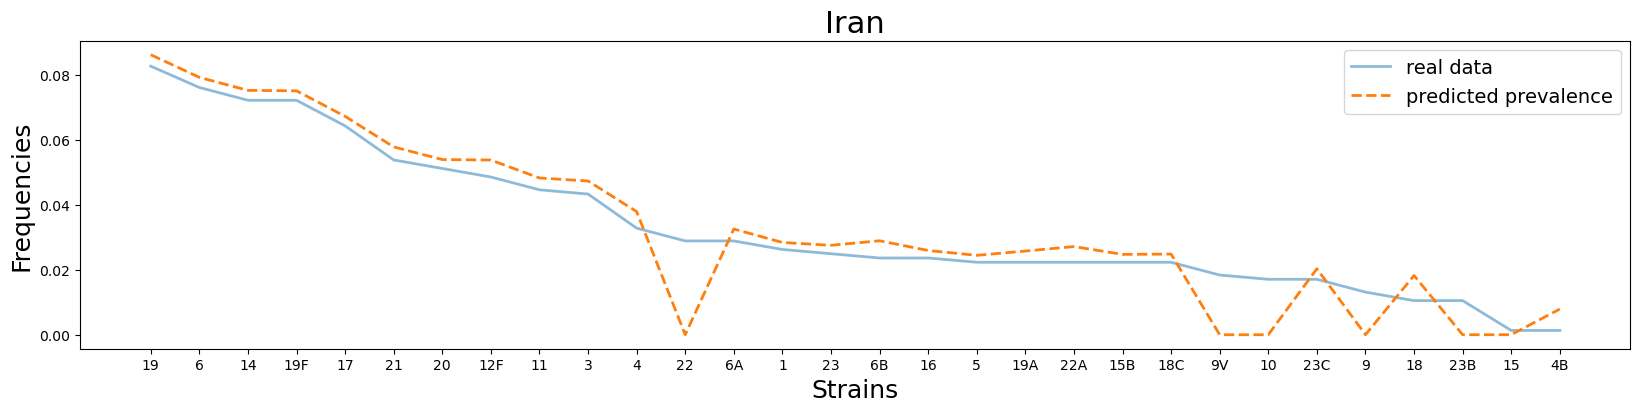

In [12]:
#FINAL TEST by data plot
range_strain = np.linspace(0, strain_number - 1, strain_number)
tick_label = np.array(Iran.strain)

fig = plt.figure(figsize = (20, 4))
plt.plot(range_strain, Iran_cases, '-', linewidth = 2, alpha =.5, label = 'real data')
plt.plot(range_strain, solution, '--', linewidth = 2, label = 'predicted prevalence')

plt.xlabel('Strains', fontsize = 18)
plt.ylabel('Frequencies', fontsize = 18)

plt.title('Iran', fontsize = 22)

plt.xticks(range_strain, labels = tick_label)
plt.legend(fontsize = 14)
plt.show()
#fig.savefig('Iran_estimate.png', dpi=300)